In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
DIR_IW_HS = Path("data/data_for_training/iw_hs")
DIR_IW = Path("data/data_for_training/iw")

In [3]:
df_iw = pd.read_csv(DIR_IW / "iw.csv")
df_iw_hs = pd.read_csv(DIR_IW_HS / "iw_hs.csv")

In [4]:
G_iw = nx.Graph()
G_iw_hs = nx.MultiGraph()
# 1. Create a graph from the data
G_iw.add_edges_from(df_iw[["entity_1", "entity_2"]].itertuples(index=False, name=None))

for u, pred, v in df_iw_hs[["entity_1", "predicate", "entity_2"]].itertuples(index=False):
    G_iw_hs.add_edge(u, v, predicate=pred)

In [25]:
# 2. Calculate basic graph statistics
n_nodes_iw = G_iw.number_of_nodes()
n_nodes_iw_hs = G_iw_hs.number_of_nodes()
n_edges_iw = G_iw.number_of_edges()
n_edges_iw_hs = G_iw_hs.number_of_edges()

# 3. Calculate density
density_iw = nx.density(G_iw)
density_iw_hs = nx.density(G_iw_hs)

# 4. Calculate average degree
avg_degree_iw = np.mean(list(G_iw.degree()))
avg_degree_iw_hs = np.mean(list(G_iw_hs.degree()))

In [26]:
from collections import Counter
deg_dist_iw = Counter(dict(G_iw.degree()).values())
deg_dist_iw_hs = Counter(dict(G_iw_hs.degree()).values())

In [27]:
#  5. Description of the graph
degrees_G_iw = dict(G_iw.degree())
deg_values_G_iw = np.array(list(degrees_G_iw.values()))

degrees_G_iw_hs = dict(G_iw_hs.degree()) 
deg_values_G_iw_hs = np.array(list(degrees_G_iw_hs.values()))

In [28]:
# 6. Triangles
triangles_iw = nx.triangles(G_iw)
total_triangles_iw = sum(triangles_iw.values()) // 3

triangles_iw_hs = nx.triangles(G_iw_hs)
total_triangles_iw_hs = sum(triangles_iw_hs.values()) // 3

In [29]:
# 1-6 Raport
print(f"Nodes: {n_nodes_iw} (iw), {n_nodes_iw_hs} (iw_hs)")
print(f"Edges: {n_edges_iw} (iw), {n_edges_iw_hs} (iw_hs)")
print(f"Density: {density_iw} (iw), {density_iw_hs} (iw_hs)")
print(f"Avg degree: {avg_degree_iw:.2f} (iw), {avg_degree_iw_hs:.2f} (iw_hs)")
print("----------------------------------------------")
print("Avg degree iw:", deg_values_G_iw.mean())
print("Median degree iw:", np.median(deg_values_G_iw))
print("Min degree iw:", np.min(deg_values_G_iw))
print("25% degree iw:", np.percentile(deg_values_G_iw, 25))
print("75% degree iw:", np.percentile(deg_values_G_iw, 75))
print("95% degree iw:", np.percentile(deg_values_G_iw, 95))
print("99% degree iw:", np.percentile(deg_values_G_iw, 99))
print("Max degree iw:", deg_values_G_iw.max())
print("----------------------------------------------")
print("Avg degree iw+hs:", deg_values_G_iw_hs.mean())
print("Median degree iw+hs:", np.median(deg_values_G_iw_hs))
print("Min degree iw+hs:", np.min(deg_values_G_iw_hs))
print("25% degree iw+hs:", np.percentile(deg_values_G_iw_hs, 25))
print("75% degree iw+hs:", np.percentile(deg_values_G_iw_hs, 75))
print("95% degree iw+hs:", np.percentile(deg_values_G_iw_hs, 95))
print("99% degree iw+hs:", np.percentile(deg_values_G_iw_hs, 99))
print("Max degree iw+hs:", deg_values_G_iw_hs.max())
print("----------------------------------------------")
print("Total triangles iw:", total_triangles_iw)
print("Total triangles iw+hs:", total_triangles_iw_hs)

Nodes: 1408851 (iw), 1408851 (iw_hs)
Edges: 4212941 (iw), 6451947 (iw_hs)
Density: 4.245076801608115e-06 (iw), 6.5011616670884e-06 (iw_hs)
Avg degree: 352218.65 (iw), 352220.24 (iw_hs)
----------------------------------------------
Avg degree iw: 5.980676451945593
Median degree iw: 1.0
Min degree iw: 1
25% degree iw: 1.0
75% degree iw: 2.0
95% degree iw: 5.0
99% degree iw: 88.0
Max degree iw: 16688
----------------------------------------------
Avg degree iw+hs: 9.159161614677492
Median degree iw+hs: 3.0
Min degree iw+hs: 1
25% degree iw+hs: 2.0
75% degree iw+hs: 6.0
95% degree iw+hs: 19.0
99% degree iw+hs: 109.0
Max degree iw+hs: 16688
----------------------------------------------
Total triangles iw: 31825829
Total triangles iw+hs: 48186019


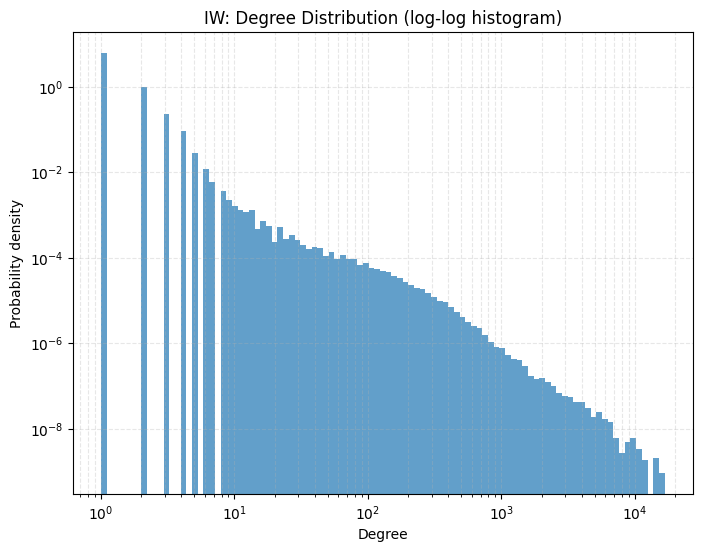

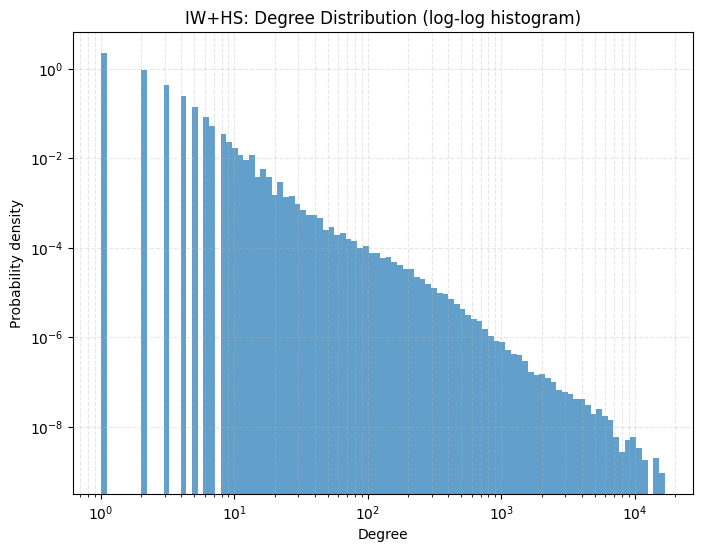

In [30]:
def loglog_hist(degrees, title):
    plt.figure(figsize=(8,6))
    # Используем логарифмические бины, бикоз корректно для heavy-tailed
    bins = np.logspace(np.log10(1), np.log10(degrees.max()+1), 100)
    
    plt.hist(degrees, bins=bins, density=True, alpha=0.7)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Degree")
    plt.ylabel("Probability density")
    plt.title(title)
    plt.grid(True, which="both", ls="--", alpha=0.3)
    plt.show()

loglog_hist(deg_values_G_iw, "IW: Degree Distribution (log-log histogram)")
loglog_hist(deg_values_G_iw_hs, "IW+HS: Degree Distribution (log-log histogram)")


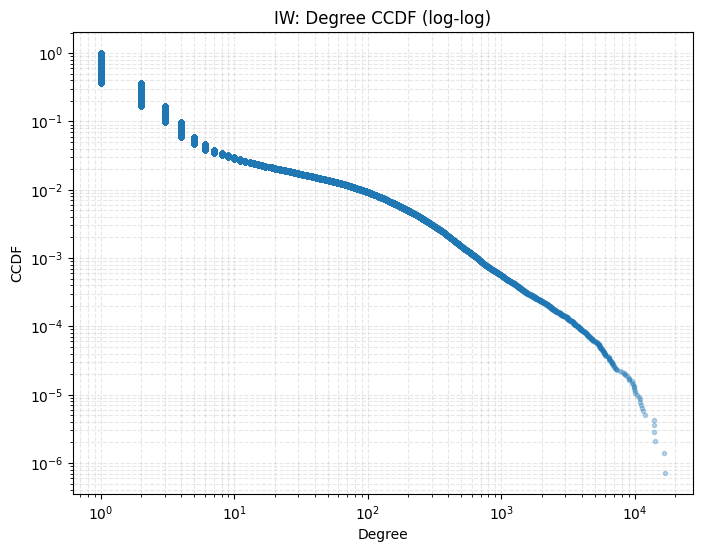

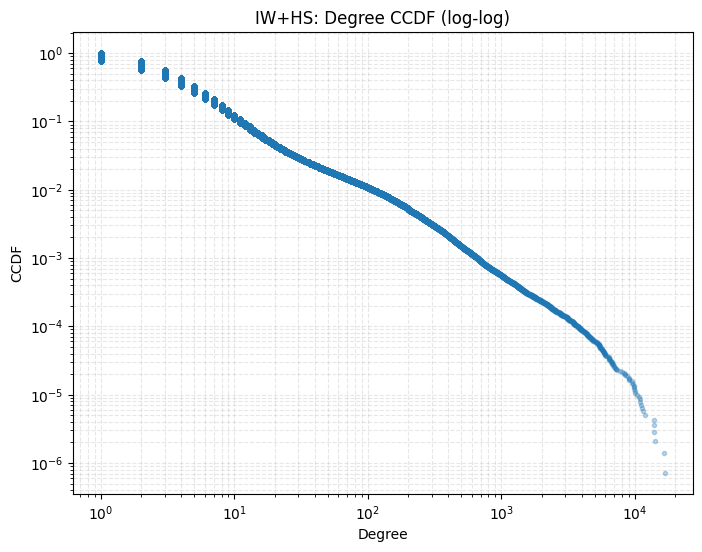

In [31]:
def ccdf_plot(degrees, title):
    degrees_sorted = np.sort(degrees)
    N = len(degrees_sorted)

    ccdf = 1.0 - np.arange(N) / float(N)
    
    plt.figure(figsize=(8,6))
    plt.loglog(degrees_sorted, ccdf, marker='.', alpha=0.3, linestyle='none')
    plt.xlabel("Degree")
    plt.ylabel("CCDF")
    plt.title(title)
    plt.grid(True, which="both", ls="--", alpha=0.3)
    plt.show()

ccdf_plot(deg_values_G_iw, "IW: Degree CCDF (log-log)")
ccdf_plot(deg_values_G_iw_hs, "IW+HS: Degree CCDF (log-log)")

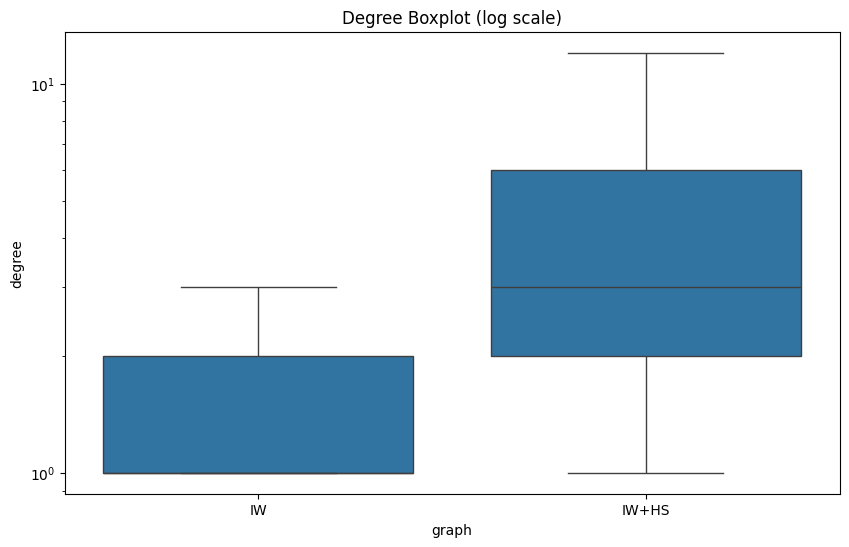

In [32]:
df = pd.DataFrame({
    "degree": np.concatenate([deg_values_G_iw, deg_values_G_iw_hs]),
    "graph": ["IW"] * len(deg_values_G_iw) + ["IW+HS"] * len(deg_values_G_iw_hs)
})

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="graph", y="degree", showfliers=False)
plt.yscale("log")
plt.title("Degree Boxplot (log scale)")
plt.show()

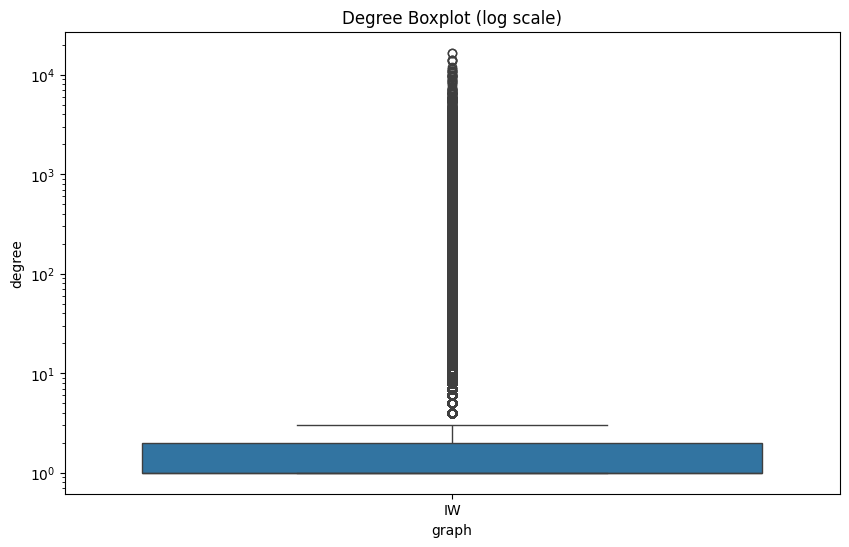

In [33]:
df = pd.DataFrame({
    "degree": np.concatenate([deg_values_G_iw]),
    "graph": ["IW"] * len(deg_values_G_iw)
})

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="graph", y="degree")
plt.yscale("log")
plt.title("Degree Boxplot (log scale)")
plt.show()

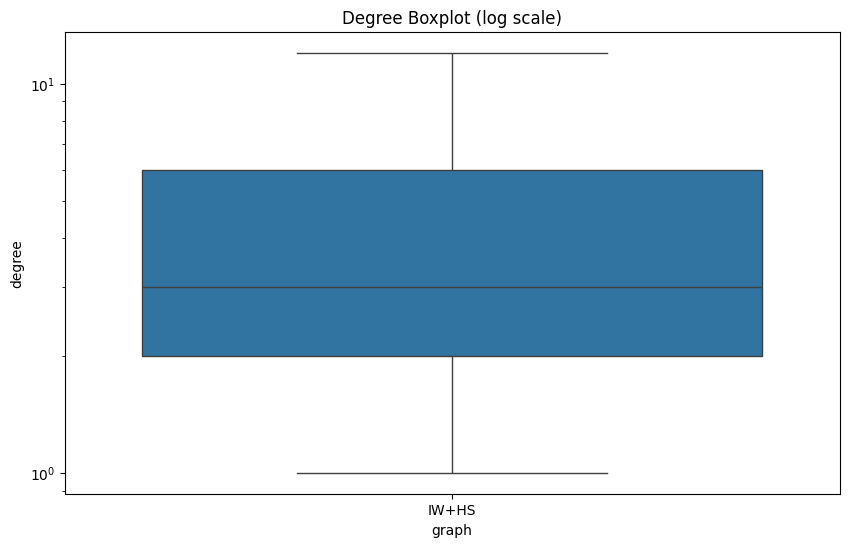

In [34]:
df = pd.DataFrame({
    "degree": deg_values_G_iw_hs,
    "graph": ["IW+HS"] * len(deg_values_G_iw_hs)
})

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="graph", y="degree", showfliers=False)
plt.yscale("log")
plt.title("Degree Boxplot (log scale)")
plt.show()

In [ ]:
target_density = 1e-3
G_cur_iw = G_iw.copy()
G_cur_iw.remove_edges_from(nx.selfloop_edges(G_cur_iw))

for k in range(1, 100):  
    G_cur_iw = nx.k_core(G_cur_iw, k=k)
    d = nx.density(G_cur_iw)
    print(f"k={k}, nodes={G_cur_iw.number_of_nodes()}, edges={G_cur_iw.number_of_edges()}, density={d}")
    if d >= target_density:
        print("Target reached at k=", k)
        break

k=1, nodes=1408729, edges=4204089, density=4.236891038570517e-06
k=2, nodes=517102, edges=3313303, density=2.478218269303315e-05
k=3, nodes=236110, edges=2752321, density=9.874205385972221e-05
k=4, nodes=135357, edges=2451064, density=0.00026756322068849305
k=5, nodes=81170, edges=2235285, density=0.0006785426615646137
k=6, nodes=60893, edges=2134688, density=0.0011514280227401252
Target reached at k= 6


In [5]:
target_density = 1e-3
G_cur_iw_hs = G_iw_hs.copy()
G_simple = nx.Graph(G_cur_iw_hs)
G_simple.remove_edges_from(nx.selfloop_edges(G_simple))

for k in range(1, 100):  
    G_simple = nx.k_core(G_simple, k=k)
    d = nx.density(G_simple)
    print(f"k={k}, nodes={G_simple.number_of_nodes()}, edges={G_simple.number_of_edges()}, density={d}")
    if d >= target_density:
        print("Target reached at k=", k)
        break

k=1, nodes=1408729, edges=6443095, density=6.4933666880407396e-06
k=2, nodes=1079114, edges=6113976, density=1.0500729565042845e-05
k=3, nodes=771563, edges=5562942, density=1.86892685435566e-05
k=4, nodes=557044, edges=5006088, density=3.2266380689092296e-05
k=5, nodes=397959, edges=4472206, density=5.647759894793831e-05
k=6, nodes=296496, edges=4051390, density=9.217175033595814e-05
k=7, nodes=223109, edges=3696143, density=0.0001485068643267622
k=8, nodes=176863, edges=3436012, density=0.00021969144650874032
k=9, nodes=141023, edges=3210227, density=0.00032284117546320867
k=10, nodes=117504, edges=3044741, density=0.0004410407778120605
k=11, nodes=99152, edges=2903500, density=0.000590681336051875
k=12, nodes=86201, edges=2792341, density=0.0007515863412203566
k=13, nodes=74798, edges=2688449, density=0.0009610757807943397
k=14, nodes=67219, edges=2612092, density=0.0011562209415797047
Target reached at k= 14


In [45]:
num_loops = len(list(nx.selfloop_edges(G_iw_hs)))
print(num_loops)


8852


In [38]:
final_G_iw = nx.k_core(G_cur_iw, k=4)

G_simple_for_kcore = nx.Graph(G_simple)
k_core_nodes = set(nx.k_core(G_simple_for_kcore, k=7).nodes())

final_G_iw_hs = G_iw_hs.subgraph(k_core_nodes).copy()

In [40]:
# Сохраняем граф final_G_iw в CSV
df = pd.DataFrame(final_G_iw.edges(), columns=["entity_1","entity_2"])
df["predicate"] = "interacts_with"
df = df[["entity_1","predicate","entity_2"]]

# Создаём директорию, если её нет
output_dir = Path("data/data_for_training/kcore")
output_dir.mkdir(parents=True, exist_ok=True)

df.to_csv(output_dir / "iw_core.csv", index=False)
print(f"Сохранено {len(df)} рёбер в {output_dir / 'iw_core.csv'}")

Сохранено 2134688 рёбер в data/data_for_training/kcore/iw_core.csv


In [42]:
rows = []
for u, v, key, data in final_G_iw_hs.edges(keys=True, data=True):
    rows.append([u, data["predicate"], v])

df_out = pd.DataFrame(rows, columns=["entity_1", "predicate", "entity_2"])

output_dir.mkdir(exist_ok=True, parents=True)
df_out.to_csv(output_dir / "iw_hs_kcore.csv", index=False)
print(f"Сохранено {len(df_out)} рёбер в {output_dir / 'iw_core.csv'}")

Сохранено 3703898 рёбер в data/data_for_training/kcore/iw_core.csv


In [47]:
num_loops = len(list(nx.selfloop_edges(final_G_iw_hs)))
print(num_loops)

7755
